<a href="https://colab.research.google.com/github/emnordi/ce888/blob/master/Lab7/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from zipfile import ZipFile
import shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
os.environ['KAGGLE_USERNAME'] = "emilnordin" # username from the json file

os.environ['KAGGLE_KEY'] = "fd1ae7405c909d36a1ecffea5cd2749a" # key from the json file

Using TensorFlow backend.


https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection#apple_12.jpg
Fruit images dataset

In [2]:
!kaggle datasets download -d mbkinaci/fruit-images-for-object-detection

 18% 5.00M/28.4M [00:00<00:00, 36.9MB/s]
100% 28.4M/28.4M [00:00<00:00, 112MB/s] 


In [3]:
file_name = "/content/fruit-images-for-object-detection.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
data_dir_list = os.listdir('/content/train_zip')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/train_zip/train"))
file_count = len(files)
print(file_count)

['train']
480


In [5]:
data_dir_list = os.listdir('/content/test_zip')
print(data_dir_list)
path_t, dirs_t, files_t = next(os.walk("/content/test_zip/test"))
file_count = len(files_t)
print(file_count)

['test']
120


In [6]:
print(os.listdir('/content/'))

['.config', 'fruit-images-for-object-detection.zip', 'train_zip', 'test_zip', 'sample_data']


In [0]:
original_dataset_dir = '/content/train_zip/train'
test_dataset_dir = '/content/test_zip/test'
base_dir = '/content/apples_dataset'
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_apples_dir = os.path.join(train_dir, 'apples')
os.mkdir(train_apples_dir)

train_banana_dir = os.path.join(train_dir, 'banana')
os.mkdir(train_banana_dir)

train_orange_dir = os.path.join(train_dir, 'orange')
os.mkdir(train_orange_dir)

validation_apples_dir = os.path.join(validation_dir, 'apples')
os.mkdir(validation_apples_dir)

validation_banana_dir = os.path.join(validation_dir, 'banana')
os.mkdir(validation_banana_dir)

validation_orange_dir = os.path.join(validation_dir, 'orange')
os.mkdir(validation_orange_dir)

test_apples_dir = os.path.join(test_dir, 'apples')
os.mkdir(test_apples_dir)

test_banana_dir = os.path.join(test_dir, 'banana')
os.mkdir(test_banana_dir)

test_orange_dir = os.path.join(test_dir, 'orange')
os.mkdir(test_orange_dir)

In [0]:
fnames = ['apple_{}.jpg'.format(i) for i in range(1, 60)]
for fname in fnames:
    if fname != 'apple_34.jpg':
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_apples_dir, fname)
      #print(src,dst)
      shutil.copyfile(src, dst)
    
fnames = ['banana_{}.jpg'.format(i) for i in range(1, 60)]
for fname in fnames:
  if fname not in ['banana_15.jpg', 'banana_18.jpg', 'banana_19.jpg']:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_banana_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['orange_{}.jpg'.format(i) for i in range(1, 60)]
for fname in fnames:
  if fname not in ['orange_39.jpg', 'orange_45.jpg']:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_orange_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['apple_{}.jpg'.format(i) for i in range(60, 76)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_apples_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['banana_{}.jpg'.format(i) for i in range(60, 76)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_banana_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['orange_{}.jpg'.format(i) for i in range(60, 76)]
for fname in fnames:
  if fname not in ['orange_65.jpg', 'orange_66.jpg']:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_orange_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['apple_{}.jpg'.format(i) for i in range(77, 95)]
for fname in fnames:
    src = os.path.join(test_dataset_dir, fname)
    dst = os.path.join(validation_apples_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['banana_{}.jpg'.format(i) for i in range(77, 95)]
for fname in fnames:
    src = os.path.join(test_dataset_dir, fname)
    dst = os.path.join(validation_banana_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['orange_{}.jpg'.format(i) for i in range(77, 95)]
for fname in fnames:
  if fname not in ['orange_88.jpg']:
    src = os.path.join(test_dataset_dir, fname)
    dst = os.path.join(validation_orange_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('total training apple images:', len(os.listdir(train_apples_dir)))
print('total training banana images:', len(os.listdir(train_banana_dir)))
print('total training orange images:', len(os.listdir(train_orange_dir)))

print('total validation apple images:', len(os.listdir(validation_apples_dir)))
print('total validation banana images:', len(os.listdir(validation_banana_dir)))
print('total validation orange images:', len(os.listdir(validation_orange_dir)))

print('total test apple images:', len(os.listdir(test_apples_dir)))
print('total test banana images:', len(os.listdir(test_banana_dir)))
print('total test orange images:', len(os.listdir(test_orange_dir)))

total training apple images: 58
total training banana images: 56
total training orange images: 57
total validation apple images: 18
total validation banana images: 18
total validation orange images: 17
total test apple images: 16
total test banana images: 16
total test orange images: 14


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [12]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 171 images belonging to 3 classes.
Found 53 images belonging to 3 classes.


In [14]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)




Epoch 1/30




/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "





100/100 [==============================] - 39s 386ms/step - loss: -2.9644 - acc: 0.4688 - val_loss: -4.7344 - val_acc: 0.5642
Epoch 2/30
100/100 [==============================] - 24s 242ms/step - loss: -5.0479 - acc: 0.6235 - val_loss: -4.6070 - val_acc: 0.6704
Epoch 3/30
100/100 [==============================] - 24s 241ms/step - loss: -5.1816 - acc: 0.6621 - val_loss: -4.9372 - val_acc: 0.6512
Epoch 4/30
100/100 [==============================] - 24s 236ms/step - loss: -5.2424 - acc: 0.6662 - val_loss: -4.6968 - val_acc: 0.6592
Epoch 5/30
100/100 [==============================] - 24s 241ms/step - loss: -5.2853 - acc: 0.6671 - val_loss: -4.9386 - val_acc: 0.6480
Epoch 6/30
100/100 [==============================] - 24s 244ms/step - loss: -5.3196 - acc: 0.6663 - val_loss: -4.5759 - val_acc: 0.6744
Epoch 7/30
100/100 [==============================] - 24s 245ms/step - loss: -5.3081 - acc: 0.6654 - val_loss: -4.7155 - val_acc: 0.6704
Epoch 8/30
100/100 [=============================

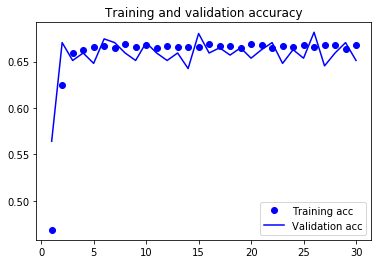

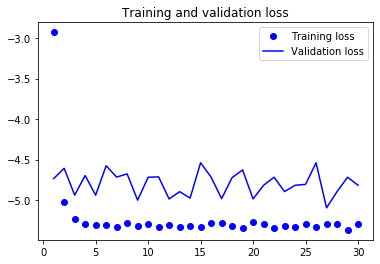

In [15]:
model.save('fruit_classification1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 27s 268ms/step - loss: -2.9596 - acc: 0.4439 - val_loss: -4.2292 - val_acc: 0.5475
Epoch 2/30
100/100 [==============================] - 25s 251ms/step - loss: -4.9458 - acc: 0.6269 - val_loss: -4.7032 - val_acc: 0.6313
Epoch 3/30
100/100 [==============================] - 25s 249ms/step - loss: -5.2121 - acc: 0.6507 - val_loss: -4.5600 - val_acc: 0.6628
Epoch 4/30
100/100 [==============================] - 25s 251ms/step - loss: -5.2834 - acc: 0.6641 - val_loss: -4.5404 - val_acc: 0.6648
Epoch 5/30
100/100 [==============================] - 25s 247ms/step - loss: -5.2627 - acc: 0.6682 - val_loss: -4.3829 - val_acc: 0.6592
Epoch 6/30
100/100 [==============================] - 25s 249ms/step - loss: -5.3385 - acc: 0.6628 - val_loss: -4.6930 - val_acc: 0.6395
Epoch 7/30
100/100 [==============================] - 25s 252ms/step - loss: -5.2736 - acc: 0.6688 - val_loss: -4.7336 - val_acc: 0.6425
Epoch 8/30
100/100 [==============================] 

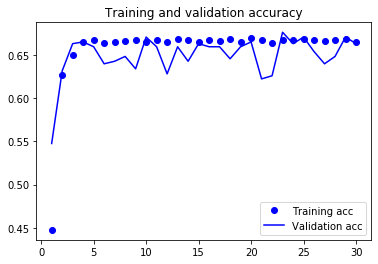

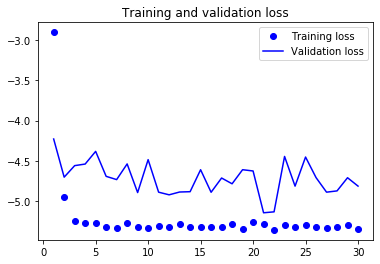

In [18]:
model.save('fruit_classification_dropout.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()